# Natural Language Processing
## Word2Vec

In [105]:
# Import necessary library
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import spacy
from collections import Counter
import textwrap

## 1. Create some data

In [106]:
# text that we want to use as corpus
# From https://en.wikipedia.org/wiki/Asian_Institute_of_Technology

text = """BCI is basically the idea of using brain signals for communication and control.  There are three components in BCI: (1) Signal acquisition (e.g., EEG, fNIRS), (2) Signal Processing (i.e., feature extraction, classification), (3) Command Translation (e.g., mapping the signal to particular commands).   As we can see, BCI is an interdisciplinary field concerning signal processing, machine learning, human-computer interaction, cognitive/neuroscience.  And similar to most computer science fields, problems in BCI are similar to computer vision, speech recognition, time-series analysis, control systems, and robotics.
The field of BCI has been established since the 1960s - 1970s with a lot of promise.  However, contrary to the belief that "most obvious areas" are done, BCI is still in its infancy.  Most of the time, BCI suffers from quality data.  For example, the data we gather from EEG, most of the time, contains a lot of noise.  In addition, BCI use is still very limited in the lab or for medical use, given the cost of expensive equipment and lengthy training time.  Although there is some commercial BCI available such as Emotiv, since the quality has been traded for its low cost, it is difficult to get reliable performance. 
Note: For a full introduction, see my PDF here:  Introduction to EEG and BCI (PDF)
Why is BCI hard?
Variability - individuals' variability in brain signals.  This variability is task-specific and user-specific.  Thus all BCI systems must be calibrated before they can be used.  Current research focuses on developing a transferable model of BCI that works across users.
Signal-to-noise ratio - concerns the removal of artifacts while preserving the "weak" EEG signal.  Effective signal processing and machine learning are key here.  All approaches here are fundamentally statistical and computational.
Research areas that tackle this challenge
Machine learning and signal processing - by utilizing effective and sophisticated machine learning and signal processing techniques, brain signals can be classified into accurate intent of the users
Interface design - by designing a new interface under the scientific ground of neuroscience (e.g., exploiting how signals are evoked by the brain), one can improve the accuracy and speed of BCI  
There are mainly three subtypes of BCI (Zander et al. 2009)
Active BCI:  A BCI of which users consciously control/manipulate their thoughts to control an application
Reactive BCI: A BCI of which output from brain activity arise from external stimulation, independent of users' conscious thoughts
Passive BCI: A BCI of which focused on utilizing our daily brain signals (without users' conscious thoughts) to enrich our daily life/interaction 
The field of BCI remains very active and productive.  These are some areas of BCI:
BCI for communication - focuses on developing speller (P300, Hybrid, Hex) for locked-in patients so they can communicate with their caregivers
BCI for control - focuses on using BCI to control neuroprostheses devices, for home automation, for gaming and etc.
BCI for clinical purpose - an area concerning the use of BCI for clinical purposes.  Neurofeedback is one area of BCI for training users' attention regulation.  Invasive BCI is another important area of BCI concerning the implantation of an actual device inside the brain.  The spatial resolution is much better compared to non-invasive techniques (e.g., EEG) but is often only used for patients who are already paralyzed on the inside and require urgent treatment.
BCI for monitoring - an area concerning effect/intent/cognitive state detection using the brain signals.  Workload, fatigue, breaking intent, lie detection is some example states.  Often, this brain signal has been used to understand human emotion and cognition, to improve the user experience, or to provide adaptive interfaces.  This area, coupled with other physiological sensors, can provide very powerful biological representations of human emotions and behaviors.
Available tools:
BioSig - oldest open-source BCI toolboxes for offline processing (no GUI)
BCI2000 - written in C++ and mainly for online processing (acquisition, running experiments) but lack offline processing (e.g., algorithms)
OpenViBE - written in C++;  gives a block programming (for non-programmers).  Requires Lua knowledge to extend/customize.
BCILAB - Matlab-based; lots of algorithms.  Requires Matlab knowledge to extend/customize.  Little support for acquisition systems but can tie to Lab Streaming Layer (LSL), a low-level technology that allows the exchange of time series data between devices.
EEGLAB - Matlab-based; lots of algorithms.   Requires Matlab to extend/customize
MNE-python + other python libraries - python-based; for programmers.  Lots of examples online.  Work well with other python libraries.  Requires python knowledge to extend/customize. 
For a more in-depth intro, read here (PDF)"""

# Use textwrap fill function to convert it's into a single chunk of strings
# If not use text wrap we need to manually add "\" at the back of each lines
# .strip() because textwrap will return linebreak characters
corpus = textwrap.fill(text, width=1000000000, replace_whitespace=False).strip()
corpus

'BCI is basically the idea of using brain signals for communication and control.  There are three components in BCI: (1) Signal acquisition (e.g., EEG, fNIRS), (2) Signal Processing (i.e., feature extraction, classification), (3) Command Translation (e.g., mapping the signal to particular commands).   As we can see, BCI is an interdisciplinary field concerning signal processing, machine learning, human-computer interaction, cognitive/neuroscience.  And similar to most computer science fields, problems in BCI are similar to computer vision, speech recognition, time-series analysis, control systems, and robotics.\nThe field of BCI has been established since the 1960s - 1970s with a lot of promise.  However, contrary to the belief that "most obvious areas" are done, BCI is still in its infancy.  Most of the time, BCI suffers from quality data.  For example, the data we gather from EEG, most of the time, contains a lot of noise.  In addition, BCI use is still very limited in the lab or for

In [107]:
# Change to lower case

# Tokenized
nlp = spacy.load("en_core_web_sm")
# .lower to change all of words to lower case
corpus_tokenized = nlp(corpus.lower())

# Get list of word from corpus tokenized because it easier to work with (I do not sure the correct ways to
# do this but I think this should be ok for now)
word_list = list()
for word in corpus_tokenized:
    word_list.append(''+word.text+'')

word_list[0:5]

['bci', 'is', 'basically', 'the', 'idea']

In [108]:
# Try to make word list into the same format as the one taught in the class.

corpus_formated = list()
temp_list = list()
counter = 0
for word in word_list:
    if counter == 10:
        corpus_formated.append(temp_list)
        temp_list = list()
        counter = 0
    temp_list.append(word)
    counter += 1

corpus_formated[0:5]

[['bci',
  'is',
  'basically',
  'the',
  'idea',
  'of',
  'using',
  'brain',
  'signals',
  'for'],
 ['communication',
  'and',
  'control',
  '.',
  ' ',
  'there',
  'are',
  'three',
  'components',
  'in'],
 ['bci', ':', '(', '1', ')', 'signal', 'acquisition', '(', 'e.g.', ','],
 ['eeg', ',', 'fnirs', ')', ',', '(', '2', ')', 'signal', 'processing'],
 ['(',
  'i.e.',
  ',',
  'feature',
  'extraction',
  ',',
  'classification',
  ')',
  ',',
  '(']]

In [109]:
# Get word sequences and unique words
flatten = lambda l: [item for sublist in l for item in sublist]
vocab = list(set(flatten(corpus_formated)))
vocab

['without',
 'biosig',
 'bci',
 'lengthy',
 'equipment',
 'adaptive',
 'manipulate',
 'time',
 'very',
 'so',
 'matlab',
 'lsl',
 'automation',
 'key',
 'mne',
 'better',
 '1970s',
 'support',
 'however',
 'effective',
 'acquisition',
 'obvious',
 'variability',
 'ratio',
 '/',
 'cost',
 'classified',
 'block',
 'expensive',
 'toolboxes',
 'cognition',
 'accuracy',
 '.',
 'learning',
 'challenge',
 'why',
 'programming',
 'infancy',
 'model',
 'are',
 'ground',
 'running',
 'lot',
 'intent',
 'use',
 'level',
 'used',
 'we',
 'contains',
 'eeglab',
 'weak',
 'although',
 'python',
 'knowledge',
 'done',
 'there',
 'monitoring',
 'etc',
 'hex',
 'while',
 'more',
 'area',
 'works',
 'powerful',
 ';',
 'exploiting',
 'interfaces',
 'in',
 'offline',
 'promise',
 'implantation',
 'patients',
 '-',
 '  ',
 'conscious',
 'three',
 'experience',
 'statistical',
 ',',
 'traded',
 'physiological',
 'reliable',
 'accurate',
 'analysis',
 'get',
 'written',
 'al',
 'removal',
 'i.e.',
 'individu

In [110]:
# Numericalize

# assign id to those vocabs
word2index = dict()
word2index.update({"<UNK>":  0})
for idx, v in enumerate(vocab):
        word2index.update({v:  idx + 1})

#add <UNK>, which is a very normal token exists in the world
vocab.append('<UNK>') #chaky, can it be ##UNK, or UNKKKKKK, or anything

# Testing
word2index['bci']

3

In [111]:
# Checked if we position unknown token correctly
word2index

{'<UNK>': 0,
 'without': 1,
 'biosig': 2,
 'bci': 3,
 'lengthy': 4,
 'equipment': 5,
 'adaptive': 6,
 'manipulate': 7,
 'time': 8,
 'very': 9,
 'so': 10,
 'matlab': 11,
 'lsl': 12,
 'automation': 13,
 'key': 14,
 'mne': 15,
 'better': 16,
 '1970s': 17,
 'support': 18,
 'however': 19,
 'effective': 20,
 'acquisition': 21,
 'obvious': 22,
 'variability': 23,
 'ratio': 24,
 '/': 25,
 'cost': 26,
 'classified': 27,
 'block': 28,
 'expensive': 29,
 'toolboxes': 30,
 'cognition': 31,
 'accuracy': 32,
 '.': 33,
 'learning': 34,
 'challenge': 35,
 'why': 36,
 'programming': 37,
 'infancy': 38,
 'model': 39,
 'are': 40,
 'ground': 41,
 'running': 42,
 'lot': 43,
 'intent': 44,
 'use': 45,
 'level': 46,
 'used': 47,
 'we': 48,
 'contains': 49,
 'eeglab': 50,
 'weak': 51,
 'although': 52,
 'python': 53,
 'knowledge': 54,
 'done': 55,
 'there': 56,
 'monitoring': 57,
 'etc': 58,
 'hex': 59,
 'while': 60,
 'more': 61,
 'area': 62,
 'works': 63,
 'powerful': 64,
 ';': 65,
 'exploiting': 66,
 'interf

In [112]:
# Create index2word dictionary
index2word = {v:k for k, v in word2index.items()}
index2word

{0: '<UNK>',
 1: 'without',
 2: 'biosig',
 3: 'bci',
 4: 'lengthy',
 5: 'equipment',
 6: 'adaptive',
 7: 'manipulate',
 8: 'time',
 9: 'very',
 10: 'so',
 11: 'matlab',
 12: 'lsl',
 13: 'automation',
 14: 'key',
 15: 'mne',
 16: 'better',
 17: '1970s',
 18: 'support',
 19: 'however',
 20: 'effective',
 21: 'acquisition',
 22: 'obvious',
 23: 'variability',
 24: 'ratio',
 25: '/',
 26: 'cost',
 27: 'classified',
 28: 'block',
 29: 'expensive',
 30: 'toolboxes',
 31: 'cognition',
 32: 'accuracy',
 33: '.',
 34: 'learning',
 35: 'challenge',
 36: 'why',
 37: 'programming',
 38: 'infancy',
 39: 'model',
 40: 'are',
 41: 'ground',
 42: 'running',
 43: 'lot',
 44: 'intent',
 45: 'use',
 46: 'level',
 47: 'used',
 48: 'we',
 49: 'contains',
 50: 'eeglab',
 51: 'weak',
 52: 'although',
 53: 'python',
 54: 'knowledge',
 55: 'done',
 56: 'there',
 57: 'monitoring',
 58: 'etc',
 59: 'hex',
 60: 'while',
 61: 'more',
 62: 'area',
 63: 'works',
 64: 'powerful',
 65: ';',
 66: 'exploiting',
 67: 'in

In [113]:
# Check vocab size
voc_size = len(vocab)
print(voc_size)

357


## 2. Prepare train data

In [114]:
def random_batch(batch_size, word_sequence, window_size=1):

# I fix a little from Chaky so we can modify the window_size
    
    # Make skip gram of one size window
    skip_grams = []
    # loop each word sequence
    # we starts from 1 because 0 has no context
    # we stop at second last for the same reason
    for sent in corpus_formated:
        for i in range(1, len(sent) - 1): # So we can modify the window size
            target = word2index[sent[i]]
            
            context = list()
            # ['a', 'b', 'c', 'd', 'e'] if window size = 2 and target is c
            # this is basically append 'b', 'd', 'a', 'e' into context
            
            for j in range(window_size):
                
                if i - (j + 1) >= 0: # Check if it outside of range from the left of list
                    context.append(word2index[sent[i - (j + 1)]])
                
                if i + (j + 1) < len(sent): # Check if it outside of range from the right of list
                    context.append(word2index[sent[i + (j + 1)]])
            
            #context = [word2index[sent[i - 1]], word2index[sent[i + 1]]]
            for w in context:
                skip_grams.append([target, w])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False) #randomly pick without replacement
        
    for i in random_index:
        random_inputs.append([skip_grams[i][0]])  # target, e.g., 2
        random_labels.append([skip_grams[i][1]])  # context word, e.g., 3
            
    return np.array(random_inputs), np.array(random_labels)

### Testing the method

In [115]:
#testing the method
batch_size = 2 # mini-batch size
input_batch, target_batch = random_batch(batch_size, corpus_formated, 2)

print("Input: ", input_batch)
print("Target: ", target_batch)
#we will convert them to tensor during training, so don't worry...

Input:  [[221]
 [285]]
Target:  [[321]
 [166]]


## 3. Model

$$J(\theta) = -\frac{1}{T}\sum_{t=1}^{T}\sum_{\substack{-m \leq j \leq m \\ j \neq 0}}\log P(w_{t+j} | w_t; \theta)$$

where $P(w_{t+j} | w_t; \theta) = $

$$P(o|c)=\frac{\exp(\mathbf{u_o^{\top}v_c})}{\sum_{w=1}^V\exp(\mathbf{u_w^{\top}v_c})}$$

where $o$ is the outside words and $c$ is the center word

In [116]:
class Skipgram(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Skipgram,self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size)
        self.embedding_u = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        all_embeds    = self.embedding_u(all_vocabs) #   [batch_size, voc_size, emb_size]
        
        scores      = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, voc_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, voc_size, 1] = [batch_size, voc_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)    
            
        return nll # negative log likelihood

In [117]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

#use for the normalized term in the probability calculation
all_vocabs = prepare_sequence(list(vocab), word2index).expand(batch_size, len(vocab))  # [batch_size, voc_size]
all_vocabs.shape

torch.Size([2, 357])

### Window_size = 1

In [118]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model          = Skipgram(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [119]:
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

#use for the normalized term in the probability calculation
all_vocabs = prepare_sequence(list(vocab), word2index).expand(batch_size, len(vocab))  # [batch_size, voc_size]
all_vocabs.shape

torch.Size([2, 357])

In [120]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [121]:
import time

# Training
start_train_time = time.time()
num_epochs = 10000
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch(batch_size, corpus_formated, window_size=2)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")
        start = time.time()
end_train_time = time.time()
train_time_mins, train_time_secs = epoch_time(start_train_time, end_train_time)
print(f'Total time use in skipgram with window size of 1 {train_time_mins} miniute(s) {train_time_secs} second')

Epoch: 1000 | cost: 4.825675 | time: 0m 5s
Epoch: 2000 | cost: 7.426296 | time: 0m 4s
Epoch: 3000 | cost: 7.911368 | time: 0m 4s
Epoch: 4000 | cost: 6.011353 | time: 0m 4s
Epoch: 5000 | cost: 6.356013 | time: 0m 4s
Epoch: 6000 | cost: 6.429048 | time: 0m 4s
Epoch: 7000 | cost: 5.794166 | time: 0m 4s
Epoch: 8000 | cost: 6.002380 | time: 0m 4s
Epoch: 9000 | cost: 5.708331 | time: 0m 4s
Epoch: 10000 | cost: 5.850629 | time: 0m 4s
Total time use in skipgram with window size of 1 0 miniute(s) 45 second


In [122]:
#let's write a function to get embedding given a word
def get_embed(word):
    id_tensor = torch.LongTensor([word2index[word]])
    v_embed = model.embedding_v(id_tensor)
    u_embed = model.embedding_u(id_tensor) 
    word_embed = (v_embed + u_embed) / 2 
    x, y = word_embed[0][0].item(), word_embed[0][1].item()

    return x, y

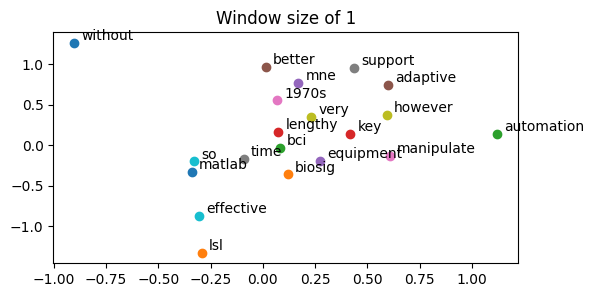

In [123]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Window size of 1')
plt.show()

### Cosine similarity of window size = 1

In [124]:
window1_eeg = get_embed('eeg')
window1_bci = get_embed('bci')
window1_data = get_embed('data')
window1_signal = get_embed('signal')

In [125]:
#scipy version
from scipy import spatial

def cos_sim(a, b):
    cos_sim = 1 - spatial.distance.cosine(a, b)  #distance = 1 - similarlity, because scipy only gives distance
    return cos_sim

print(f"bci vs. eeg: ",        cos_sim(window1_bci, window1_eeg))
print(f"bci vs. data: ",       cos_sim(window1_bci, window1_data))
print(f"bci vs. signal: ",          cos_sim(window1_bci, window1_signal))

bci vs. eeg:  0.5125124865288821
bci vs. data:  0.5963340373814485
bci vs. signal:  0.13156638612237936


### Window Size 2

In [126]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model          = Skipgram(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [127]:
import time

# Training
start_train_time = time.time()
num_epochs = 10000
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch(batch_size, corpus_formated, window_size=2)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")
        start = time.time()
end_train_time = time.time()
skipgram_train_time_mins, skipgram_train_time_secs = epoch_time(start_train_time, end_train_time)
print(f'Total time use in skipgram with window size of 2 {skipgram_train_time_mins} miniute(s) {skipgram_train_time_secs} second')



Epoch: 1000 | cost: 7.958686 | time: 0m 4s
Epoch: 2000 | cost: 6.351381 | time: 0m 4s
Epoch: 3000 | cost: 5.863877 | time: 0m 4s
Epoch: 4000 | cost: 5.835044 | time: 0m 4s
Epoch: 5000 | cost: 5.237994 | time: 0m 4s
Epoch: 6000 | cost: 6.378914 | time: 0m 4s
Epoch: 7000 | cost: 6.333809 | time: 0m 4s
Epoch: 8000 | cost: 5.765247 | time: 0m 4s
Epoch: 9000 | cost: 6.151443 | time: 0m 4s
Epoch: 10000 | cost: 6.220193 | time: 0m 4s
Total time use in skipgram with window size of 2 0 miniute(s) 42 second


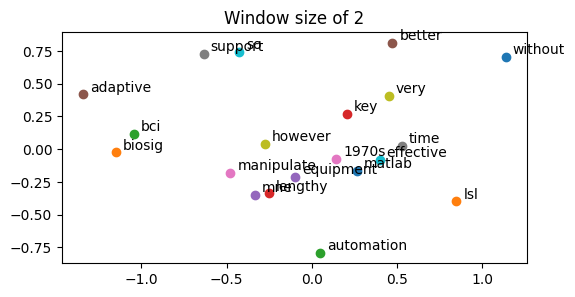

In [128]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Window size of 2')
plt.show()

### Cosine similarity of window size = 2

In [129]:
window2_eeg = get_embed('eeg')
window2_bci = get_embed('bci')
window2_data = get_embed('data')
window2_signal = get_embed('signal')
print(f'Window size of 1')
print(f"bci vs. eeg: ",        cos_sim(window1_bci, window1_eeg))
print(f"bci vs. data: ",       cos_sim(window1_bci, window1_data))
print(f"bci vs. signal: ",     cos_sim(window1_bci, window1_signal))
print(f'Window size of 2')
print(f"bci vs. eeg: ",        cos_sim(window2_bci, window2_eeg))
print(f"bci vs. data: ",       cos_sim(window2_bci, window2_data))
print(f"bci vs. signal: ",     cos_sim(window2_bci, window2_signal))

Window size of 1
bci vs. eeg:  0.5125124865288821
bci vs. data:  0.5963340373814485
bci vs. signal:  0.13156638612237936
Window size of 2
bci vs. eeg:  -0.017350792771322565
bci vs. data:  -0.6699449442916894
bci vs. signal:  0.9800057715918116


### CBOW

In [130]:
# random batch for cbow

def random_batch(batch_size, word_sequence, window_size=1):

    cbow = []
    for idx, sent in enumerate(corpus_formated):
        for i in range(1, len(sent) - 1):
            target = word2index[sent[i]]
            
            # Create the list of word that we want according to window size
            context_word = sent[0:i] + sent[i+1:] # Noted: The context word can be odd e.g, 3
            # I do it's this way because my corpus is too small, otherwise If I selected the window_size of 2
            # I can only use middle word to train e.g, ['a', 'b', 'c', 'd', 'e'] can only select c as target word
            # and ['a', 'b', 'd', 'e'] as context word  
            context = list()

            # Change the word to index
            for word in context_word:
                context.append(word2index[word])

            cbow.append([context, target])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(cbow)), batch_size, replace=False) #randomly pick without replacement
        
    for i in random_index:
        random_inputs.append(cbow[i][0])  # target, e.g., 2
        random_labels.append([cbow[i][1]])  # context word, e.g., 3

    # For testing the window size
    #print(f'sentence = {sent} position in corpus_formatted {idx}')
    #print(f'target = {target}')
    #print(f'context = {context}')
            
    return np.array(random_inputs), np.array(random_labels)

In [131]:
# Random batch for cbow

def random_batch_cbow(batch_size, word_sequence, window_size=1):

    cbow = []

    for sent in corpus_formated:
        for i in range(1, len(sent) - 1): # So we can modify the window size
            target = word2index[sent[i]]
            context = list()
            
            for j in range(window_size):
                
                if i - (j + 1) >= 0: # Check if it outside of range from the left of list
                    context.append(word2index[sent[i - (j + 1)]])
                
                if i + (j + 1) < len(sent): # Check if it outside of range from the right of list
                    context.append(word2index[sent[i + (j + 1)]])
            
            # This part is different from skipgram
            # Now we use all context as input and target as label
            for w in context:
                cbow.append([context, target])
    
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(cbow)), batch_size, replace=False) #randomly pick without replacement
    
    for i in random_index:
        random_inputs.append(cbow[i][0])  # Context word that we want as input
        random_labels.append([cbow[i][1]])  # Target word that we want as label
    
    return np.array(random_inputs), np.array(random_labels)

In [132]:
#testing the method
batch_size = 2 # mini-batch size
input_batch, target_batch = random_batch_cbow(batch_size, corpus_formated, 2)

print("Input: ", input_batch)
print("Target: ", target_batch)
#we will convert them to tensor during training, so don't worry...

Input:  [[147  33 217 192]
 [249 280 202 348]]
Target:  [[340]
 [341]]


In [133]:
class Cbow(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(Cbow,self).__init__() # Not sure why we super(Cbow) or super(Skipgram)?
        self.embedding_v = nn.Embedding(vocab_size, emb_size)
        self.embedding_u = nn.Embedding(vocab_size, emb_size)
    
    def forward(self, center_words, target_words, all_vocabs):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        all_embeds    = self.embedding_u(all_vocabs) #   [batch_size, voc_size, emb_size]
        
        scores      = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]

        norm_scores = all_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, voc_size, emb_size] @ [batch_size, emb_size, 1] = [batch_size, voc_size, 1] = [batch_size, voc_size]

        nll = -torch.mean(torch.log(torch.exp(scores)/torch.sum(torch.exp(norm_scores), 1).unsqueeze(1))) # log-softmax
        # scalar (loss must be scalar)    
            
        return nll # negative log likelihood

In [134]:
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model          = Cbow(voc_size, embedding_size)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [135]:
# Training
import time
num_epochs = 5000
start = time.time()
for epoch in range(num_epochs):
    
    input_batch, target_batch = random_batch_cbow(batch_size, corpus_formated)
    input_batch  = torch.LongTensor(input_batch)  #[batch_size, 1]
    target_batch = torch.LongTensor(target_batch) #[batch_size, 1]

    optimizer.zero_grad()
    loss = model(input_batch, target_batch, all_vocabs)
    
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 1000 == 0:
        end = time.time()
        epoch_mins, epoch_secs = epoch_time(start, end)
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")
        start = time.time()


Epoch: 1000 | cost: 6.389846 | time: 0m 3s
Epoch: 2000 | cost: 6.736654 | time: 0m 3s
Epoch: 3000 | cost: 5.054564 | time: 0m 4s
Epoch: 4000 | cost: 6.181332 | time: 0m 3s
Epoch: 5000 | cost: 6.026557 | time: 0m 4s


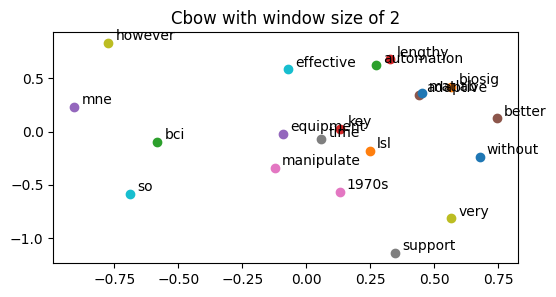

In [136]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Cbow with window size of 2')
plt.show()

### Cbow cosine similarity

In [137]:
cbow_eeg = get_embed('eeg')
cbow_bci = get_embed('bci')
cbow_data = get_embed('data')
cbow_signal = get_embed('signal')
print(f'Window size of 1')
print(f"bci vs. eeg: ",        cos_sim(cbow_bci, cbow_eeg))
print(f"bci vs. data: ",       cos_sim(cbow_bci, cbow_data))
print(f"bci vs. signal: ",     cos_sim(cbow_bci, cbow_signal))

Window size of 1
bci vs. eeg:  -0.19096865529195073
bci vs. data:  0.5238305690549324
bci vs. signal:  0.8422084876843174


## Word2Vec with Negative Sampling

### Unigram distribution

$$P(w)=U(w)^{3/4}/Z$$

In [138]:
Z = 0.001

In [139]:
from collections import Counter

word_count = Counter(flatten(corpus_formated))
num_total_words = sum([c for w, c in word_count.items()])

In [140]:
# Check if the counting work
word_count['bci'], num_total_words

(33, 980)

In [141]:
# Create unigram table
unigram_table = []

for vo in vocab:
    unigram_table.extend([vo] * int(((word_count[vo]/num_total_words)**0.75)/Z))

In [142]:
Counter(unigram_table)

Counter({'without': 5,
         'biosig': 5,
         'bci': 78,
         'lengthy': 5,
         'equipment': 5,
         'adaptive': 5,
         'manipulate': 5,
         'time': 19,
         'very': 13,
         'so': 5,
         'matlab': 16,
         'lsl': 5,
         'automation': 5,
         'key': 5,
         'mne': 5,
         'better': 5,
         '1970s': 5,
         'support': 5,
         'however': 5,
         'effective': 9,
         'acquisition': 13,
         'obvious': 5,
         'variability': 13,
         'ratio': 5,
         '/': 29,
         'cost': 9,
         'classified': 5,
         'block': 5,
         'expensive': 5,
         'toolboxes': 5,
         'cognition': 5,
         'accuracy': 5,
         '.': 87,
         'learning': 16,
         'challenge': 5,
         'why': 5,
         'programming': 5,
         'infancy': 5,
         'model': 5,
         'are': 29,
         'ground': 5,
         'running': 5,
         'lot': 9,
         'intent': 13,
        

### Negative Sampling

In [143]:
import random

# Does the same thing as above.
def prepare_sequence(seq, word2index):
    idxs = list(map(lambda w: word2index[w] if word2index.get(w) is not None else word2index["<UNK>"], seq))
    return torch.LongTensor(idxs)

# Pick values from the table that we create before.
def negative_sampling(targets, unigram_table, k):
    batch_size = targets.size(0)
    neg_samples = []
    for i in range(batch_size):
        nsample = []
        target_index = targets[i].item()
        while len(nsample) < k: # num of sampling
            neg = random.choice(unigram_table)
            if word2index[neg] == target_index:
                continue
            nsample.append(neg)
        neg_samples.append(prepare_sequence(nsample, word2index).view(1, -1))
    
    return torch.cat(neg_samples)

In [144]:
# Just testing if it work
input_batch  = torch.Tensor(input_batch)
target_batch = torch.LongTensor(target_batch)

In [145]:
target_batch.shape

torch.Size([2, 1])

In [146]:
num_neg = 3
negative_sampling(target_batch, unigram_table, num_neg)

#{'grapes': 0, 'apple': 1, 'animal': 2, 'cat': 3, 'ice': 4, 'orange': 5, 'dog': 6, 'monkey': 7, 'conda': 8, 'fruit': 9, 'banana': 10}

tensor([[291,  40, 134],
        [292, 313,  23]])

In [147]:
target_batch[1]

tensor([249])

### Model

In [148]:
class SkipgramNegSampling(nn.Module):
    
    def __init__(self, vocab_size, emb_size):
        super(SkipgramNegSampling, self).__init__()
        self.embedding_v = nn.Embedding(vocab_size, emb_size) # center embedding
        self.embedding_u = nn.Embedding(vocab_size, emb_size) # out embedding
        self.logsigmoid = nn.LogSigmoid()
                    
    def forward(self, center_words, target_words, negative_words):
        center_embeds = self.embedding_v(center_words) # [batch_size, 1, emb_size]
        target_embeds = self.embedding_u(target_words) # [batch_size, 1, emb_size]
        neg_embeds    = -self.embedding_u(negative_words) # [batch_size, num_neg, emb_size]
        
        positive_score = target_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2)
        #[batch_size, 1, emb_size] @ [batch_size, emb_size, 1] = [batch_size, 1, 1] = [batch_size, 1]
        
        negative_score = torch.sum(neg_embeds.bmm(center_embeds.transpose(1, 2)).squeeze(2), 1).view(neg_embeds.size(0), -1) # BxK -> Bx1
        #[batch_size, k, emb_size] @ [batch_size, emb_size, 1] = [batch_size, k, 1] = [batch_size, k] ==sum==> [batch_size, 1]
        
        # This is what had been changed from the normal one.
        loss = self.logsigmoid(positive_score) + self.logsigmoid(negative_score)
        
        return -torch.mean(loss)
    
    def prediction(self, inputs):
        embeds = self.embedding_v(inputs)
        
        return embeds

In [149]:
# Initialize parameter
batch_size     = 2 # mini-batch size
embedding_size = 2 #so we can later plot
model          = SkipgramNegSampling(voc_size, embedding_size)
num_neg        = 10 # num of negative sampling

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [150]:
import time

start_train_time = time.time()

# Training
num_epochs = 10000
for epoch in range(num_epochs):
    
    start = time.time()
    
    input_batch, target_batch = random_batch(batch_size, corpus, 2)
    
    #input_batch: [batch_size, 1]
    input_batch = torch.LongTensor(input_batch)
    
    #target_batch: [batch_size, 1]
    target_batch = torch.LongTensor(target_batch)
    
    #negs_batch:   [batch_size, num_neg]
    negs_batch = negative_sampling(target_batch, unigram_table, num_neg)
    
    optimizer.zero_grad()
        
    loss = model(input_batch, target_batch, negs_batch)
    
    end = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start, end)
    
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch: {epoch + 1} | cost: {loss:.6f} | time: {epoch_mins}m {epoch_secs}s")

end_train_time = time.time()
neg_train_time_mins, neg_train_time_secs = epoch_time(start_train_time, end_train_time)
print(f'Total time use in negative sampling {neg_train_time_mins} miniute(s) {neg_train_time_secs} second')


Epoch: 1000 | cost: 2.785679 | time: 0m 0s
Epoch: 2000 | cost: 1.094472 | time: 0m 0s
Epoch: 3000 | cost: 1.565882 | time: 0m 0s
Epoch: 4000 | cost: 1.039228 | time: 0m 0s
Epoch: 5000 | cost: 1.169468 | time: 0m 0s
Epoch: 6000 | cost: 1.298866 | time: 0m 0s
Epoch: 7000 | cost: 1.243497 | time: 0m 0s
Epoch: 8000 | cost: 1.510622 | time: 0m 0s
Epoch: 9000 | cost: 1.235586 | time: 0m 0s
Epoch: 10000 | cost: 1.374768 | time: 0m 0s
Total time use in negative sampling 0 miniute(s) 32 second


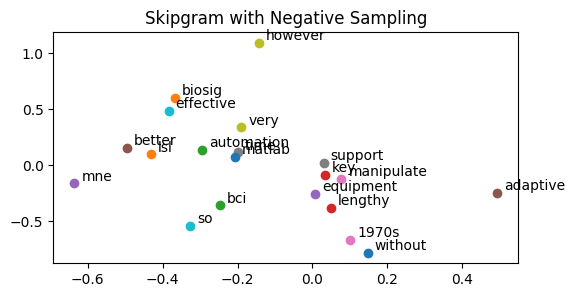

In [151]:
plt.figure(figsize=(6,3))
for i, word in enumerate(vocab[:20]): #loop each unique vocab
    x, y = get_embed(word)
    plt.scatter(x, y)
    plt.annotate(word, xy=(x, y), xytext=(5, 2), textcoords='offset points')
plt.title('Skipgram with Negative Sampling')
plt.show()

### Comparing with normal skipgram

In [152]:
skipgram_neg_eeg = get_embed('eeg')
skipgram_neg_bci = get_embed('bci')
skipgram_neg_data = get_embed('data')
skipgram_neg_signal = get_embed('signal')

print(f'Skipgram with Window size of 2')
print(f"bci vs. eeg: ",        cos_sim(window2_bci, window2_eeg))
print(f"bci vs. data: ",       cos_sim(window2_bci, window2_data))
print(f"bci vs. signal: ",     cos_sim(window2_bci, window2_signal))
print(f'Total time use in skipgram {skipgram_train_time_mins} miniute(s) {skipgram_train_time_secs} second')

print(f'Skipgram with neg sam with Window size of 2')
print(f"bci vs. eeg: ",        cos_sim(skipgram_neg_bci, skipgram_neg_eeg))
print(f"bci vs. data: ",       cos_sim(skipgram_neg_bci, skipgram_neg_data))
print(f"bci vs. signal: ",     cos_sim(skipgram_neg_bci, skipgram_neg_signal))
print(f'Total time use in negative sampling {neg_train_time_mins} miniute(s) {neg_train_time_secs} second')

Skipgram with Window size of 2
bci vs. eeg:  -0.017350792771322565
bci vs. data:  -0.6699449442916894
bci vs. signal:  0.9800057715918116
Total time use in skipgram 0 miniute(s) 42 second
Skipgram with neg sam with Window size of 2
bci vs. eeg:  -0.17672152713111378
bci vs. data:  -0.7531892882910385
bci vs. signal:  -0.668613090758285
Total time use in negative sampling 0 miniute(s) 32 second
